# Elasticidad

In [1]:
"""
FEniCS tutorial demo program: Linear elastic problem.

  -div(sigma(u)) = f

The model is used to simulate an elastic beam clamped at
its left end and deformed under its own weight.
"""

'\nFEniCS tutorial demo program: Linear elastic problem.\n\n  -div(sigma(u)) = f\n\nThe model is used to simulate an elastic beam clamped at\nits left end and deformed under its own weight.\n'

In [2]:
from __future__ import print_function
from fenics import *

In [3]:
# Scaled variables
L = 1; W = 0.2
mu = 1
rho = 1
delta = W/L
gamma = 0.4*delta**2
beta = 1.25
lambda_ = beta
g = gamma

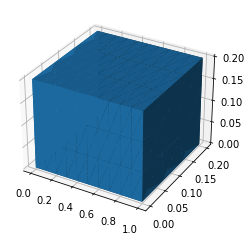

In [5]:
# Create mesh and define function space
mesh = BoxMesh(Point(0, 0, 0), Point(L, W, W), 10, 3, 3)
V = VectorFunctionSpace(mesh, 'P', 1)
plot(mesh)

In [6]:
# Define boundary condition
tol = 1E-14

def clamped_boundary(x, on_boundary):
    return on_boundary and x[0] < tol

bc = DirichletBC(V, Constant((0, 0, 0)), clamped_boundary)

In [9]:
from ufl import nabla_grad
from ufl import nabla_div

In [10]:
# Define strain and stress

def epsilon(u):
    return 0.5*(nabla_grad(u) + nabla_grad(u).T)
    #return sym(nabla_grad(u))

def sigma(u):
    return lambda_*nabla_div(u)*Identity(d) + 2*mu*epsilon(u)

In [11]:
# Define variational problem
u = TrialFunction(V)
d = u.geometric_dimension()  # space dimension
v = TestFunction(V)
f = Constant((0, 0, -rho*g))
T = Constant((0, 0, 0))
a = inner(sigma(u), epsilon(v))*dx
L = dot(f, v)*dx + dot(T, v)*ds

In [12]:
# Compute solution
u = Function(V)
solve(a == L, u, bc)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.


*** Warning: Matplotlib plotting backend does not support displacement for 3 in 3. Continuing without plotting...


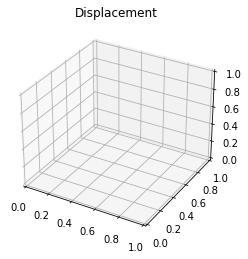

In [13]:
# Plot solution
plot(u, title='Displacement', mode='displacement')

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


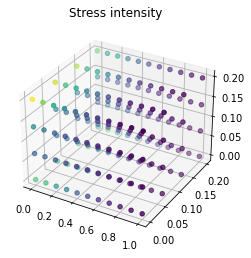

In [14]:
# Plot stress
s = sigma(u) - (1./3)*tr(sigma(u))*Identity(d)  # deviatoric stress
von_Mises = sqrt(3./2*inner(s, s))
V = FunctionSpace(mesh, 'P', 1)
von_Mises = project(von_Mises, V)
plot(von_Mises, title='Stress intensity')

Calling FFC just-in-time (JIT) compiler, this may take some time.
min/max u: -3.879704751374078e-06 0.15458538332285884


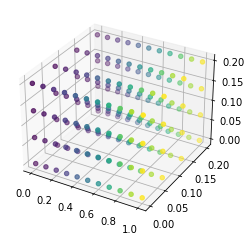

In [15]:
# Compute magnitude of displacement
u_magnitude = sqrt(dot(u, u))
u_magnitude = project(u_magnitude, V)
plot(u_magnitude, 'Displacement magnitude')
print('min/max u:',
      u_magnitude.vector().get_local().min(),
      u_magnitude.vector().get_local().max())

Los operadores de gradiente y divergencia ahora tienen un prefijo nabla_. Esto no es estrictamente necesario en el presente problema, pero se recomienda en general para PDE vectoriales que surgen de la mecánica continua, si interpreta r como un vector en la notación PDE; ver el cuadro sobre nabla_grad en la Sección 3.4.2.